In [8]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/data_song_sample.csv")
df

,track_id,track_name,first_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,neg,neu,pos,compound
0,3ZOD3aghbxBkgKsLu2jOEK,These Memories,Hollow Coves,0.521,0.265,1,-18.229,1,0.0319,0.961000,0.133000,0.0676,0.392,77.519,0.000,1.000,0.000,0.0000
1,7w87IxuO7BDcJ3YUqCyMTT,Pumped Up Kicks,Foster The People,0.733,0.710,5,-5.849,0,0.0292,0.145000,0.115000,0.0956,0.965,127.975,0.059,0.676,0.265,0.9987
2,7w87IxuO7BDcJ3YUqCyMTT,Pumped Up Kicks,Foster The People,0.733,0.710,5,-5.849,0,0.0292,0.145000,0.115000,0.0956,0.965,127.975,0.059,0.676,0.265,0.9987
3,5O2P9iiztwhomNh8xkR9lJ,Night Changes,One Direction,0.672,0.520,8,-7.747,1,0.0353,0.859000,0.000000,0.1150,0.370,120.001,0.109,0.868,0.023,-0.9825
4,7pYfyrMNPn3wtoCyqcTVoI,"Moves Like Jagger - Studio Recording From ""The...",Maroon 5,0.722,0.761,11,-4.459,0,0.0475,0.011700,0.000000,0.3150,0.624,128.044,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3ijckkIBVhBhZlltFMJhMg,Anyone,Guards,0.395,0.607,8,-6.328,0,0.0304,0.007560,0.009310,0.1500,0.766,181.832,0.148,0.718,0.133,-0.6054
96,4JHg4nNYUJQ5HULcCmI18R,What You Know,Two Door Cinema Club,0.549,0.754,6,-4.011,0,0.0407,0.000675,0.000006,0.0912,0.828,139.052,0.110,0.785,0.105,-0.8467
97,0JFRAcNxIayvSVmp3ohsix,Ain't Nobody (Loves Me Better) - Acoustic,Jasmine Thompson,0.422,0.243,2,-8.493,0,0.0346,0.848000,0.000000,0.1110,0.227,92.831,0.079,0.829,0.092,0.9922
98,2qxmye6gAegTMjLKEBoR3d,Let Me Down Slowly,Alec Benjamin,0.652,0.557,1,-5.714,0,0.0318,0.740000,0.000000,0.1240,0.483,150.073,0.088,0.788,0.124,0.9134


In [5]:
df = df.drop_duplicates(subset='track_id', keep="first")
df

,track_id,track_name,first_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,neg,neu,pos,compound
0,3ZOD3aghbxBkgKsLu2jOEK,These Memories,Hollow Coves,0.521,0.265,1,-18.229,1,0.0319,0.961000,0.133000,0.0676,0.392,77.519,0.000,1.000,0.000,0.0000
1,7w87IxuO7BDcJ3YUqCyMTT,Pumped Up Kicks,Foster The People,0.733,0.710,5,-5.849,0,0.0292,0.145000,0.115000,0.0956,0.965,127.975,0.059,0.676,0.265,0.9987
3,5O2P9iiztwhomNh8xkR9lJ,Night Changes,One Direction,0.672,0.520,8,-7.747,1,0.0353,0.859000,0.000000,0.1150,0.370,120.001,0.109,0.868,0.023,-0.9825
4,7pYfyrMNPn3wtoCyqcTVoI,"Moves Like Jagger - Studio Recording From ""The...",Maroon 5,0.722,0.761,11,-4.459,0,0.0475,0.011700,0.000000,0.3150,0.624,128.044,NaN,NaN,NaN,NaN
5,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,0.825,0.652,1,-3.183,0,0.0802,0.581000,0.000000,0.0931,0.931,95.977,0.021,0.775,0.204,0.9993
6,5tf1VVWniHgryyumXyJM7w,Sugar (feat. Francesco Yates),Robin Schulz,0.636,0.815,5,-5.098,0,0.0581,0.018500,0.000000,0.1630,0.636,123.063,0.064,0.812,0.123,0.9894
7,5zFglKYiknIxks8geR8rcL,Beautiful Mistakes (feat. Megan Thee Stallion),Maroon 5,0.713,0.676,10,-5.483,1,0.0270,0.037700,0.000000,0.1540,0.721,99.048,0.136,0.782,0.082,-0.9579
8,4h9wh7iOZ0GGn8QVp4RAOB,I Ain't Worried,OneRepublic,0.704,0.797,0,-5.927,1,0.0475,0.082600,0.000745,0.0546,0.825,139.994,0.134,0.595,0.271,0.9927
9,6xWbpC8KpcItoGd8ZOKJlU,Mary On A Cross - slowed + reverb,Ghost,0.468,0.838,6,-5.756,0,0.0433,0.000094,0.196000,0.0896,0.259,115.812,0.059,0.768,0.173,0.9871
12,1ZLrDPgR7mvuTco3rQK8Pk,Way Back Home (feat. Conor Maynard) - Sam Feld...,SHAUN,0.737,0.747,10,-4.818,1,0.0323,0.269000,0.000000,0.2190,0.447,105.943,0.032,0.895,0.073,0.7162


In [6]:
# extract relevant columns to numpy array
X = (df
     .filter(['acousticness', 'danceability', 'duration_ms', 'energy',
              'instrumentalness', 'liveness', 'loudness', 'tempo', 'valence'])
     )

# algo will do better if data is standardized (zero mean, unit variance)
Xs = StandardScaler().fit_transform(X)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


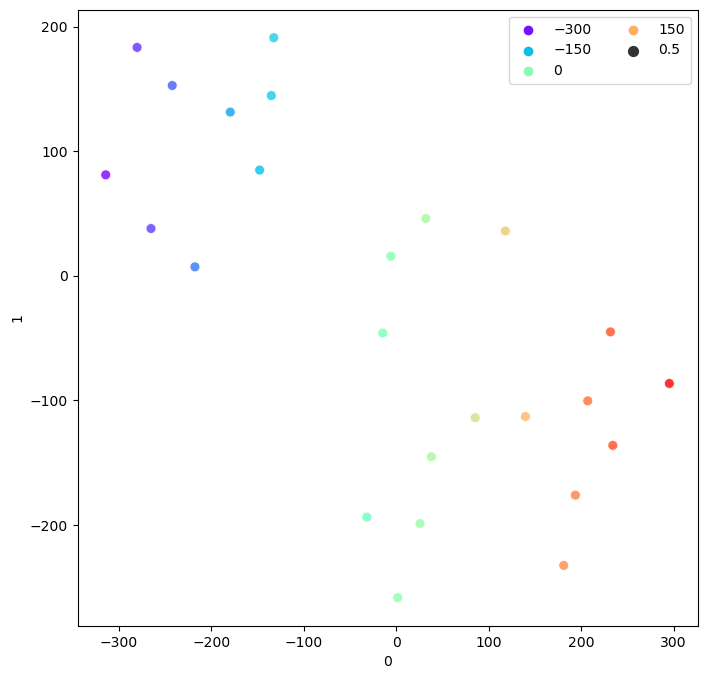

In [21]:
# construct 2-d embedding
tsne = TSNE(n_components=2, perplexity=5, 
    early_exaggeration=2, random_state=3).fit_transform(Xs)

# convert to dataframe for plotting purposes
tsne = pd.DataFrame(tsne)

plt.figure(figsize=(8,8))
ax = sns.scatterplot(data=tsne, x=0, y=1, 
                     hue=0, palette='rainbow', 
                     size=0.5, sizes=(50,1000), 
                     alpha=0.8)

# # display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:10], labs[1:10], loc='best', ncol=2)

plt.show()